## Linear Regression :- Implementation , Hyperparameters and their Optimization

### Libraries import

In [1]:
import time
import tabulate

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Load Data

In [2]:
full_data = datasets.load_diabetes()
one_feature = full_data.data[: , np.newaxis , 2]

X_train = one_feature[:-100] 
y_train = full_data.target[:-100]

X_test = one_feature[-100:]
y_test = full_data.target[-100 :]

### Plot 
Plotting Training Data

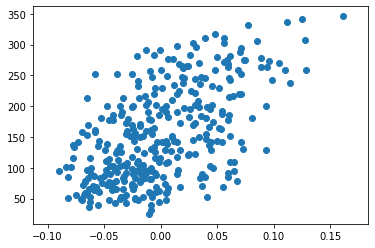

In [3]:
plt.scatter(X_train , y_train)
plt.show()

### Implementation
In statistics , peoples tends to denote Linear Regression as
$$ y = mx + c $$

where `c` (bias) can be computed as

$$ bias = \frac{ \sum_((x_i - mean(i))(y_i - mean(i))} {\sum_((x_i - mean(x))^2} $$

and weights `m` can be computed as 

$$ weight = mean(y) - (bias * mean(x)) $$

### Ordinary Least Square

In [4]:
def ordinary_least_square(x , y):
    '''
    Find weigths for the hypothesis using
        y = mx + c
    notation.
    
    Params:
        x: Independent data of training set.
        y: Dependent data of training set.
        
    Returns:
        Hypothesis function.
    '''
    
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denominator = 0
    
    for i in range(n):
        numerator += ((x[i] - xmean) * (y[i] - ymean))
        denominator += (x[i] - xmean)**2
        
    b1 = numerator /denominator
    b0 = ymean - (b1 * xmean)
    
    c = b0[0]
    m = b1[0]
    
    return lambda x: m*x + c

### Create a hypothesis
ordinary_least_square returns a lambda function which can be treated as maths f(x) function.

In [5]:
hypothesis = ordinary_least_square(X_train , y_train)

### Predictions

In [6]:
predictions = hypothesis(X_train)
predictions = predictions.reshape((342 ,))

### Plot data and Regression Line or say Best fit line

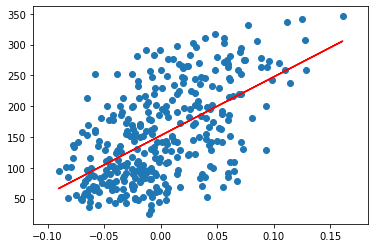

In [7]:
plt.scatter(X_train , y_train)
plt.plot(X_train , predictions , color='red')
plt.show()

### CrossCheck Time
Now , let's take linearRegression from sklearn to check the correctness of our implementation.

In [8]:
model = LinearRegression()
model.fit(X_train , y_train)
sk_predictions = model.predict(X_train)

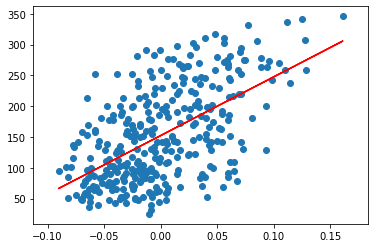

In [9]:
plt.scatter(X_train , y_train)
plt.plot(X_train , sk_predictions , color = 'red')
plt.show()

### Evaluation
mean squared error implementation

In [10]:
def mean_squared_error_custom(truth , predicted):
    m = truth.shape[0]
    mse = (np.sum((predicted - truth)**2)) / (2 * m)
    return mse

In [11]:
print("Our Implementation result {}".format(mean_squared_error_custom(y_train , predictions)))
print("Scikit learn Implementation result {}".format(mean_squared_error_custom(y_train , sk_predictions)))

Our Implementation result 1965.3937776396358
Scikit learn Implementation result 1965.3937776396358


### Batch Gradient Descent
* X is features array with built-in bias
* w initializations for weights
* y ground truth

In [12]:
x1 = full_data.data[:, np.newaxis , 1]
x1 = np.squeeze(np.asarray(x1[:-100]))

x2 = full_data.data[:, np.newaxis , 2]
x2 = np.squeeze(np.asarray(x2[:-100]))

ones = np.ones(len(x1))

X = np.array([ones , x1 , x2]).T
y = full_data.target[:-100]

### Implementation

In [13]:
def batch_gradient_descent(X, y , lr , n_iter):
    weights = np.zeros(X.shape[1])
    
    history = []
    m = len(y)
    
    predict = lambda x :np.dot(x , weights)
    derivative_w = lambda loss: X.T.dot(loss) / m
    
    for i in range(n_iter):
        hypothesis = predict(X)
        loss = hypothesis - y
        weights = weights - lr * derivative_w(loss)
        
        if i % 50 == 0:
            history.append(mean_squared_error_custom(X.dot(weights) , y))
            
    return predict , history

### Weight Optimization

In [14]:
predictor , history = batch_gradient_descent(X , y , 0.05 , 50000)

### Plot training history

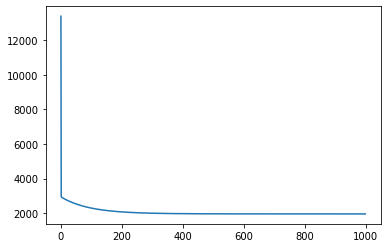

In [15]:
plt.plot(history)

### Make Predictions and get mean_squared_error

In [16]:
gd_predictions = predictor(X)
err = mean_squared_error_custom(gd_predictions , y)

print(err)

1963.4934687043767


We can se that mean square error is kind of similar. This is happened because BGD has hyperparameters which can be tuned and edited, while OLS has no hyperparameters, therefore output is always the same

### Hyperparameters 
Lets observe how hyperparameters affects our algorithm.

In lrates we define various values for learning rate hyperparameter, and in niterations various values for number of iterations hyperparamenters.

Methodology looks as the following: we will run Batch Gradient Descent with each possible combination of hyperparameters and compare them in multiple ways.

In [17]:
lrates = [0.1 , 0.5 , 0.01 , 0.001 , 0.0001]
niters = [25000 , 50000 , 150000]

In [18]:
def test(X ,y):
    """
    Test function iterates over each hyperparameter and put all the results in record list.
    """
    record = []
    
    for niter in niters:
        for lrate in lrates:
            start = time.time()
            weights , records = batch_gradient_descent(X, y , lrate , niter)
            end = time.time() - start
            record.append(dict(lrate=lrate ,niter=niter ,w=weights ,history=records ,time=end ))
            
    return record

In [19]:
rec = test(X, y)

### Plot

In [20]:
def plot_records(records):
    name_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 
                9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O'}
    ax , fig = plt.subplots(5, 3)
    ax.tight_layout()
    fig = fig.flatten()
    
    for i , record in enumerate(records):
        time = "{0:.4f}".format(record['time'])
        label = 'lr: {0}, ni: {1}, t: {2}'.format(record["lrate"], record["niter"], time)
        fig[i].plot(record['history'] , label=label)
        fig[i].set_title(name_map[i])
    
matplotlib.rcParams["figure.figsize"] = (15 ,15)

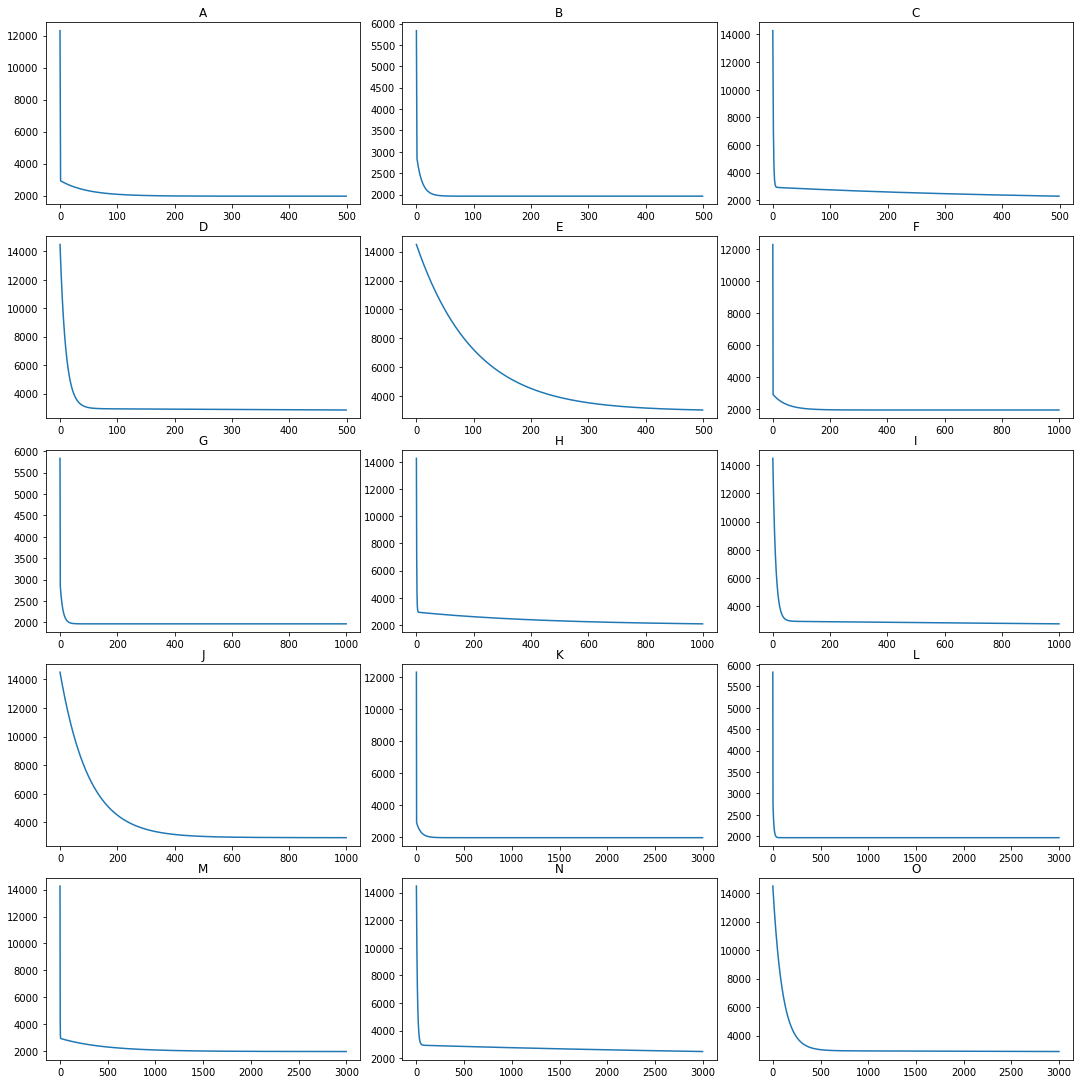

In [21]:
plot_records(rec)

Plot from above is good and clear, lets print the data out as a table.

First prepare the data, sort it by time and print.

In [22]:
time_sorted_records = sorted(rec , key=lambda k : k['time'])

In [23]:
copy_records = time_sorted_records.copy()

In [24]:
for r in copy_records:
    r['Cost']=r['history'][-1]
    del r['history']
    del r['w']

In [25]:
print(tabulate.tabulate(copy_records , headers={'lrate': 'learning rate', 'niter': 'no of iterations', 'time': 'elapsed time', 'Cost': 'cost'}))

  learning rate    no of iterations    elapsed time     cost
---------------  ------------------  --------------  -------
         0.001                25000        0.664344  2846.12
         0.01                 25000        0.665427  2299.74
         0.0001               25000        0.670085  3014.51
         0.5                  25000        0.678696  1963.47
         0.1                  25000        0.699473  1963.49
         0.5                  50000        1.34833   1963.47
         0.01                 50000        1.35192   2079.21
         0.1                  50000        1.35432   1963.47
         0.001                50000        1.3658    2755.94
         0.0001               50000        1.38555   2926.01
         0.5                 150000        4.01676   1963.47
         0.001               150000        4.02207   2478.86
         0.1                 150000        4.05991   1963.47
         0.0001              150000        4.07318   2884.86
         0.01           

Data is sorted by time because I choosed this parameter as most important. Generally we want to compute as fast as possible while result is sufficiently good.

We can see that generally that cost 3926.93 can be considered as converged.

In our case, with a given data, learning rate of .5 converged after 25000 iterations, while learning rate of .0001 has a long way to go until convergence.

Lets actually see how many iterations it need to converge:

In [26]:
weights_t, records_t = batch_gradient_descent(X, y, 0.0001, 2000000)
print(records_t[-1])

2379.2350247213276


### Optimal Hyperparameters

In [27]:
lrates = [2, 1.2, 1, .8, .5]
niterations = [1000, 5000, 10000]

optimal_rec = test(X, y)

time_sorted_optimal_records = sorted(optimal_rec, key=lambda k: k['time'])
optimal_tab_data = time_sorted_optimal_records.copy()

for r in optimal_tab_data:
    r['cost'] = r['history'][-1]
    del r['history']
    del r['w']

print(tabulate.tabulate(optimal_tab_data, headers={'lrate': 'lrate', 'niter': 'niter', 'time': 'elapsed time', 'cost': 'cost'}))

  lrate    niter    elapsed time      cost
-------  -------  --------------  --------
    0.5    25000        0.674147   1963.47
    0.8    25000        0.674809   1963.47
    1.2    25000        0.676915   1963.47
    1      25000        0.695837   1963.47
    2      25000        0.771415  14550.9
    0.5    50000        1.344      1963.47
    1.2    50000        1.34606    1963.47
    0.8    50000        1.37204    1963.47
    2      50000        1.39839   15679.5
    1      50000        1.43581    1963.47
    0.8   150000        4.06828    1963.47
    0.5   150000        4.12251    1963.47
    1.2   150000        4.13694    1963.47
    2     150000        4.19002   21300.8
    1     150000        4.22477    1963.47


In [28]:
lrates = [3, 2.5, 2, 1.5, .8]
niterations = [1000, 5000, 10000]

optimal_rec = test(X, y)

time_sorted_optimal_records = sorted(optimal_rec, key=lambda k: k['time'])
optimal_tab_data = time_sorted_optimal_records.copy()

for r in optimal_tab_data:
    r['cost'] = r['history'][-1]
    del r['history']
    del r['w']

print(tabulate.tabulate(optimal_tab_data, headers={'lrate': 'lrate', 'niter': 'niter', 'time': 'elapsed time', 'cost': 'cost'}))

/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


  lrate    niter    elapsed time      cost
-------  -------  --------------  --------
    2.5    25000        0.676167    nan
    0.8    25000        0.688363   1963.47
    2      25000        0.712631  14550.9
    1.5    25000        0.764528   1963.47
    3      25000        0.828177    nan
    1.5    50000        1.32701    1963.47
    2.5    50000        1.33529     nan
    0.8    50000        1.33731    1963.47
    2      50000        1.38057   15679.5
    3      50000        1.51449     nan
    1.5   150000        4.04906    1963.47
    0.8   150000        4.05869    1963.47
    2     150000        4.142     21300.8
    2.5   150000        4.1771      nan
    3     150000        4.30766     nan


/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


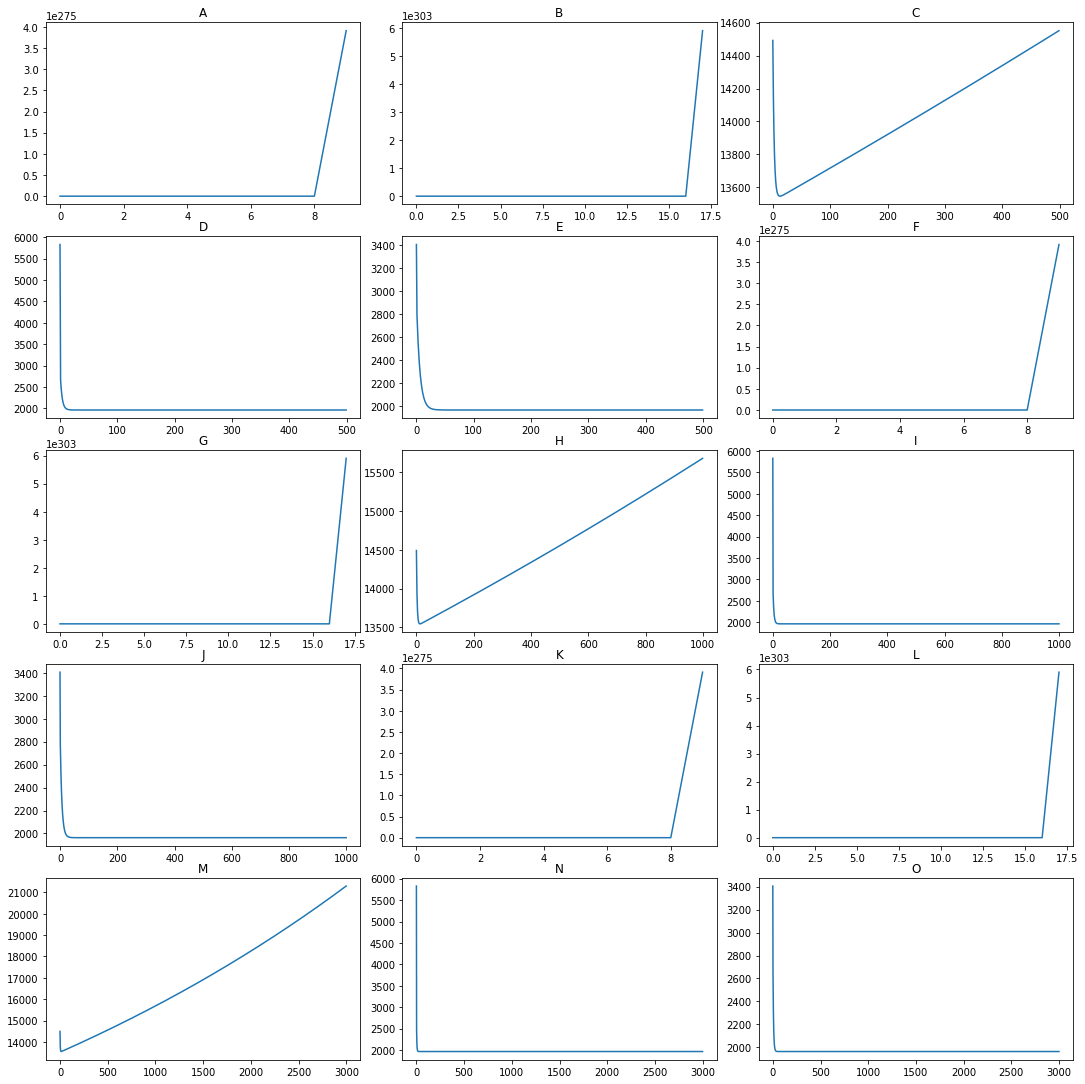

In [30]:
optimal_rec = test(X, y)
plot_records(optimal_rec)